In [2]:
from model.DB_utils import *

import pandas as pd
import numpy as np
import geopandas as gpd
import json
import matplotlib.pyplot as plt

import shapely

In [29]:
data_metro_street = pd.read_csv("data/crime_data/2025-02/2025-02-metropolitan-street.csv")
data_metro_outcomes = pd.read_csv("data/crime_data/2025-02/2025-02-metropolitan-outcomes.csv")

data_merseyside_stop_search = pd.read_csv("data/crime_data/2025-02/2025-02-merseyside-stop-and-search.csv")

In [13]:
data_metro_street[data_metro_street["LSOA code"] == 'E02000976']

In [11]:
data_metro_outcomes.head()


In [18]:
data_metro_street['Crime ID'][0]

In [14]:
len(data_metro_street[pd.notna(data_metro_street['Crime ID'])])

In [17]:
data_merseyside_stop_search.head()

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Set the parent directory path where all borough folders/files are located
parent_folder = r"C:\Users\20223112\Downloads\LB_LSOA2021_shp\LB_shp"

# Initialize an empty list to store GeoDataFrames
gdfs = []

# Loop through all files in the folder
for file in os.listdir(parent_folder):
    if file.endswith(".shp"):
        filepath = os.path.join(parent_folder, file)
        try:
            gdf = gpd.read_file(filepath)
            gdfs.append(gdf)
        except Exception as e:
            print(f"Failed to load {file}: {e}")

# Combine all GeoDataFrames into one
all_boroughs = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

# Plot
fig, ax = plt.subplots(figsize=(12, 12))
all_boroughs.plot(ax=ax, edgecolor="black", column=None, cmap="Set3")
ax.set_title("London Borough Boundaries", fontsize=16)
ax.axis("off")
plt.show()


In [15]:
gdf

In [ ]:
def list_lsoa_data_files(parent_path: str= "data/LB_shp/") -> list[str]:
    shp_files = []
    for dirpath, dirnames, filenames in os.walk(parent_path):
        for file in filenames:
            if file.endswith(".shp"):
                shp_files.append(os.path.join(dirpath, file))

    return shp_files


def combine_all_lsoa_data_files(list_of_shp_file_paths: list[str]) -> pd.DataFrame:
    gdfs = []

    for file_path in list_of_shp_file_paths:
        gdfs.append(gpd.read_file(file_path))
    
    return gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

In [9]:
from DB_utils import DBhandler
import pandas

db_handler = DBhandler(db_name="crime_data_UK_v2.db")

resulting_df = db_handler.query("SELECT name FROM sqlite_master WHERE type='table';")

db_handler.close_connection_db()

In [10]:
resulting_df

In [13]:
db_handler.open_connection_db()

district_data = db_handler.query("SELECT * FROM force_districts")
crime_data = db_handler.query("SELECT * FROM crime LIMIT 100")
lsoa_loc_data = db_handler.query("SELECT * FROM lsoa_location")

tmp_df = db_handler.query("SELECT * FROM imd_data LIMIT 1000")

db_handler.close_connection_db()

In [14]:
tmp_df.head()

In [88]:
ward_loc = gpd.read_file("data/Wards_December_2016_Boundaries_UK_BFE_2022_-5810284385438997272")
ward_loc.head()

In [94]:
temp = pd.read_csv("data/imd2019lsoa.csv")

In [95]:
temp.reset_index()

In [93]:
temp[(temp["FeatureCode"] == "E01005278") & (temp["Measurement"] == "Rank")].sort_values(by="Indices of Deprivation")

In [12]:
import pandas as pd

df = pd.read_csv("temp_results.csv")
df.head()

In [13]:
df[pd.notna(df["ward_code"])]

In [14]:
df_grouped = df.groupby(by="ward_code").agg(
    imd_val=("value", "mean"),
    num_of_crimes=("crime_id", "count")
)

df_grouped.head()

In [15]:
correlation = df_grouped["imd_val"].corr(df_grouped["num_of_crimes"])
print(correlation)

In [16]:
len(df_grouped)

In [6]:
db_handler = DBhandler(db_name="crime_data_UK_v2.db")

temp = db_handler.query("SELECT * FROM imd_data WHERE measurement like '%Decile%'", True)

db_handler.close_connection_db()

c:\Users\20223112\Documents\GitHub\Multi.-CBL-Group-04

Established connection with database!


Time it took to run the query: 3.743873

Connection successfully closed!



In [9]:
temp[temp['feature_code'] == 'E01005278'].sort_values("indices_of_deprivation").head(50)

,uuid_imd,feature_code,measurement,value,indices_of_deprivation
214492,378713,E01005278,Decile,3.0,a. Index of Multiple Deprivation (IMD)
304694,468915,E01005278,Decile,4.0,b. Income Deprivation Domain
176085,340306,E01005278,Decile,7.0,c. Employment Deprivation Domain
102678,266899,E01005278,Decile,4.0,"d. Education, Skills and Training Domain"
222672,386893,E01005278,Decile,3.0,e. Health Deprivation and Disability Domain
273191,437412,E01005278,Decile,1.0,f. Crime Domain
281616,445837,E01005278,Decile,2.0,g. Barriers to Housing and Services Domain
199973,364194,E01005278,Decile,3.0,h. Living Environment Deprivation Domain
230480,394701,E01005278,Decile,2.0,i. Income Deprivation Affecting Children Index...
72470,113526,E01005278,Decile,2.0,j. Income Deprivation Affecting Older People I...


In [10]:
temp_df = pd.read_csv("temp_results.csv")
temp_df.head()

C:\Users\20223112\AppData\Local\Temp\ipykernel_23848\2320014466.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_df = pd.read_csv("temp_results.csv")


,crime_id,month,reported_by,falls_within,long,lat,location,lsoa_code,crime_type,last_outcome_category,uuid_imd,feature_code,measurement,average_imd_decile,indices_of_deprivation,geometry,index_right,ward_code,ward_name
0,288dbdaa9724c584c5a2e6efe5c0294ae10548490f3570...,2022-04,City of London Police,City of London Police,-0.111962,51.518494,On or near Nightclub,E01000914,Theft from the person,Investigation complete; no suspect identified,383189.0,E01000914,Decile,7.0,a. Index of Multiple Deprivation (IMD),POINT (-0.111962 51.518494),112.0,E05000138,Holborn and Covent Garden
1,d05ac5361e6243053f5a983ec92647c74e49aa091f930e...,2022-04,City of London Police,City of London Police,-0.098572,51.516767,On or near King Edward Street,E01000001,Bicycle theft,Investigation complete; no suspect identified,255964.0,E01000001,Decile,9.0,a. Index of Multiple Deprivation (IMD),POINT (-0.098572 51.516767),5688.0,E05009304,Farringdon Within
2,2bf5b4d9766e08247f29482a5552c2387162900f138ebc...,2022-04,City of London Police,City of London Police,-0.098062,51.517577,On or near Montague Street,E01000001,Bicycle theft,Investigation complete; no suspect identified,255964.0,E01000001,Decile,9.0,a. Index of Multiple Deprivation (IMD),POINT (-0.098062 51.517577),5688.0,E05009304,Farringdon Within
3,40c47b2d00a0c282627673875932c61bc47127fb2a035b...,2022-04,City of London Police,City of London Police,-0.097736,51.520206,On or near Conference/Exhibition Centre,E01000001,Burglary,Investigation complete; no suspect identified,255964.0,E01000001,Decile,9.0,a. Index of Multiple Deprivation (IMD),POINT (-0.097736 51.520206),5688.0,E05009304,Farringdon Within
4,17b08b53f7fe3f4feae48ac055ab47847ee926f06f96b0...,2022-04,City of London Police,City of London Police,-0.097736,51.520206,On or near Conference/Exhibition Centre,E01000001,Burglary,Investigation complete; no suspect identified,255964.0,E01000001,Decile,9.0,a. Index of Multiple Deprivation (IMD),POINT (-0.097736 51.520206),5688.0,E05009304,Farringdon Within


In [13]:
grouped_df = temp_df.groupby(by=["ward_code", "month"]).agg(num_of_crimes=("crime_id", "count"), avg_imd_val=("average_imd_decile", "mean"))
grouped_df

num_of_crimes  avg_imd_val
ward_code month                              
E05000026 2022-04            279     2.883636
          2022-05            273     2.881481
          2022-06            268     2.901141
          2022-07            272     2.889313
          2022-08            297     2.861702
...                          ...          ...
W05000979 2022-11              1          NaN
W05000987 2023-01              1          NaN
W05000989 2023-07              1          NaN
          2024-06              1          NaN
W05000990 2023-11              1          NaN

[32854 rows x 2 columns]

<Axes: title={'center': 'Total Number of Crimes by Month and Year'}, xlabel='month'>

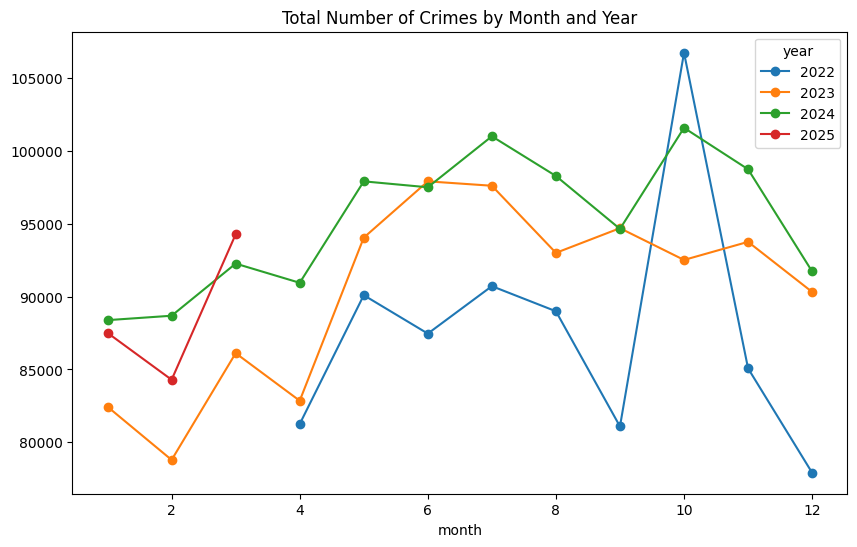

In [36]:
df_sub = grouped_df.reset_index()

df_sub[["year", "month"]] = df_sub["month"].str.split("-", expand=True)
df_sub["year"] = df_sub["year"].astype(int)
df_sub["month"] = df_sub["month"].astype(int)

agg_df = df_sub.groupby(["year", "month"])["num_of_crimes"].sum().reset_index()

pivot_df = agg_df.pivot(index="month", columns="year", values="num_of_crimes")

pivot_df.plot(marker='o', figsize=(10,6), title="Total Number of Crimes by Month and Year")


In [37]:
agg_df["month"].corr(agg_df["num_of_crimes"])


np.float64(0.31550377817673153)

In [2]:
import pandas as pd

In [67]:
df = pd.read_csv("data/OxCGRT_timeseries_StringencyIndex_v1.csv")

df = df[df["RegionCode"] == "UK_ENG"].iloc[:, 7:]

df = df.T.reset_index()

df.columns = ["date", "stringency_index"]

df['date'] = pd.to_datetime(df['date'], format='%d%b%Y')

df["year"], df["month"], df["day"] = df["date"].dt.year, df["date"].dt.month, df["date"].dt.day

df = df[["year", "month", "day", "stringency_index"]].copy()

df = df[pd.notna(df["stringency_index"])]

df = df.groupby(by=["year", "month"]).agg(stringency_index=("stringency_index", "mean")).reset_index()
df['month'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df['month'] = df['month'].dt.strftime('%Y-%m')
df = df[['month', 'stringency_index']].copy()

df.head()


,month,stringency_index
0,2020-01,2.152258
1,2020-02,10.918621
2,2020-03,34.467742
3,2020-04,79.630000
4,2020-05,68.279032


<Axes: >

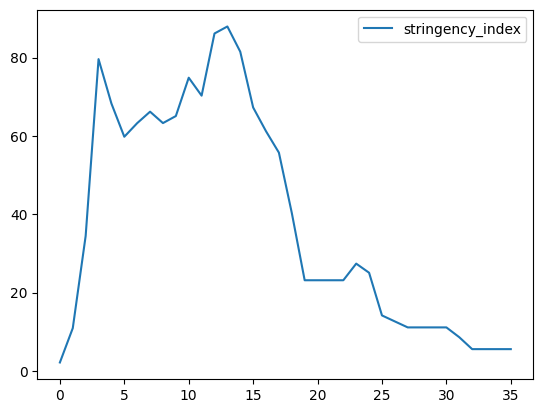

In [55]:
df.plot()

In [1]:
from model.DB_utils import DBhandler

dbh = DBhandler()
temp = dbh.query("SELECT * FROM crime LIMIT 10")
# temp2 = dbh.query("SELECT crime_id FROM crime LIMIT 10 OFFSET 9")
dbh.close_connection_db()


Established connection with database!


Connection successfully closed!



In [ ]:
temp


,crime_id,month,reported_by,falls_within,long,lat,location,lsoa_code,crime_type,last_outcome_category
0,288dbdaa9724c584c5a2e6efe5c0294ae10548490f3570...,2022-04,City of London Police,City of London Police,-0.111962,51.518494,On or near Nightclub,E01000914,Theft from the person,Investigation complete; no suspect identified
1,d05ac5361e6243053f5a983ec92647c74e49aa091f930e...,2022-04,City of London Police,City of London Police,-0.098572,51.516767,On or near King Edward Street,E01000001,Bicycle theft,Investigation complete; no suspect identified
2,2bf5b4d9766e08247f29482a5552c2387162900f138ebc...,2022-04,City of London Police,City of London Police,-0.098062,51.517577,On or near Montague Street,E01000001,Bicycle theft,Investigation complete; no suspect identified
3,40c47b2d00a0c282627673875932c61bc47127fb2a035b...,2022-04,City of London Police,City of London Police,-0.097736,51.520206,On or near Conference/Exhibition Centre,E01000001,Burglary,Investigation complete; no suspect identified
4,17b08b53f7fe3f4feae48ac055ab47847ee926f06f96b0...,2022-04,City of London Police,City of London Police,-0.097736,51.520206,On or near Conference/Exhibition Centre,E01000001,Burglary,Investigation complete; no suspect identified
5,7e8106f15a724b96e9478ba05e32ed4de941f3a2fa76bf...,2022-04,City of London Police,City of London Police,-0.097053,51.518262,On or near Aldersgate Street,E01000001,Criminal damage and arson,Investigation complete; no suspect identified
6,d7c6fc6f242ada100917670b8f817d1cd3d2bf0c27a9cf...,2022-04,City of London Police,City of London Police,-0.097736,51.520206,On or near Conference/Exhibition Centre,E01000001,Criminal damage and arson,Unable to prosecute suspect
7,82af885577c05a83c92dc428a84bfc6704ba3c8fa9eba8...,2022-04,City of London Police,City of London Police,-0.097562,51.518864,On or near Parking Area,E01000001,Drugs,Offender given a drugs possession warning
8,9cc06df8456a3036524d26b341607866836b897a010acf...,2022-04,City of London Police,City of London Police,-0.098642,51.517146,On or near Little Britain,E01000001,Theft from the person,Investigation complete; no suspect identified
9,1c3e5ae7f7932c7805d9f2a34088c929de8478003f1a0c...,2022-04,City of London Police,City of London Police,-0.098572,51.516767,On or near King Edward Street,E01000001,Theft from the person,Investigation complete; no suspect identified


In [10]:
ward_code = "E05000138"


from model.DB_utils import DBhandler
import pandas as pd

# Load DBhandler to get data path
db_handler = DBhandler(db_loc="../data/", db_name="crime_data_UK_v3.db")
db_handler.close_connection_db()

# Load CSV
try:
    df = pd.read_csv(r"C:\Users\20223112\Documents\GitHub\Multi.-CBL-Group-04\data\temp_results.csv", index_col="Unnamed: 0", low_memory=False)
except:
    raise ValueError("\nData file not found!\n")

df["month"] = pd.to_datetime(df['month'])

# Filter and aggregate by ward and month
df = df[df["ward_code"] == ward_code]
df_temp = df.groupby("month").agg(
    num_of_crimes=("crime_id", "count"),
    avg_imd=("average_imd_decile", "mean")
).sort_index()


Established connection with database!


Connection successfully closed!



In [12]:
df2 = df.sample(718).reset_index(drop=True)
df2.head()


,crime_id,month,long,lat,lsoa_code,feature_code,average_imd_decile,geometry,index_right,ward_code,ward_name
0,c127fe994fd1b191d832217fb2ac942a9fdeb46993b3ac...,2025-01-01,-0.129653,51.515189,E01000919,E01000919,4.0,POINT (-0.129653 51.515189),112.0,E05000138,Holborn and Covent Garden
1,7ddf1513e1c9aca3dda174063068f342153dd4a275dc16...,2015-11-01,-0.122563,51.521137,E01000914,E01000914,7.0,POINT (-0.122563 51.521137),112.0,E05000138,Holborn and Covent Garden
2,5dd8f947d58edfaeb8d6ea13b51ca392297cda8d4c7b30...,2021-06-01,-0.118549,51.520938,E01000915,E01000915,4.0,POINT (-0.118549 51.520938),112.0,E05000138,Holborn and Covent Garden
3,c264bc49086645212a2ce7baff2db2f37e805523b1c9b0...,2019-08-01,-0.121379,51.520129,E01000914,E01000914,7.0,POINT (-0.121379 51.520129),112.0,E05000138,Holborn and Covent Garden
4,99dd312b9e62295fec94ac5bc0f77f5807837deae6abc0...,2013-04-01,-0.126929,51.514489,E01000919,E01000919,4.0,POINT (-0.126929 51.514489),112.0,E05000138,Holborn and Covent Garden


In [ ]:
from model.DB_utils import DBhandler
import pandas as pd

dbh = DBhandler(db_name="crime_data_UK_v4.db")

crime_data = dbh.query("SELECT COUNT(crime_id) FROM crime", True)

dbh.close_connection_db()

crime_data



Established connection with database!


Time it took to run the query: 52.035241

Connection successfully closed!



,COUNT(crime_id)
0,15101878


In [3]:
from model.DB_utils import DBhandler
import pandas as pd

dbh = DBhandler(db_name="crime_data_UK_v3 - kopie.db")

ward_code = "E05000138"

query = f"""
SELECT name 
FROM sqlite_master 
WHERE type='table'
ORDER BY name;

"""

crime_data_copy = dbh.query(query)

dbh.close_connection_db()

crime_data_copy


Established connection with database!


Connection successfully closed!



,name
0,crime
1,crime_temp
2,existing_crime_ids
3,force_districts
4,imd_data
5,lsoa_location
6,ward_location


In [3]:
df1 = pd.read_csv("temp_results.csv")
df2 = pd.read_csv("temp_results2.csv")


In [8]:
df1

,Unnamed: 0,latitude,longitude,cluster
0,0,51.517898,-0.125247,2
1,1,51.518080,-0.126522,49
2,2,51.515681,-0.128884,68
3,3,51.515050,-0.127108,0
4,4,51.516083,-0.123102,98
...,...,...,...,...
703,703,51.518080,-0.126522,49
704,704,51.517041,-0.118955,4
705,705,51.515412,-0.123317,86
706,706,51.516341,-0.120151,7


In [5]:
df2

,Unnamed: 0,0,1
0,0,51.515050,-0.127108
1,1,51.518731,-0.112183
2,2,51.517988,-0.125261
3,3,51.514984,-0.125322
4,4,51.516735,-0.118996
...,...,...,...
95,95,51.515440,-0.122399
96,96,51.518661,-0.117908
97,97,51.518823,-0.110608
98,98,51.516355,-0.123142


In [26]:
df = pd.merge(df1, df2, how="left", left_on="cluster", right_on="Unnamed: 0")[["latitude", "longitude", "cluster", "0", "1"]].rename(columns={"0":"latitude_assigned_officer", "1":"longitude_assigned_officer"})
df

from geopy.distance import geodesic


df["distance"] = df.apply(lambda x: geodesic((x["latitude"], x["longitude"]), (x["latitude_assigned_officer"], x["longitude_assigned_officer"])).meters, axis=1)
df["distance"] = df["distance"].round(decimals=2)
df


,latitude,longitude,cluster,latitude_assigned_officer,longitude_assigned_officer,distance
0,51.517898,-0.125247,2,51.517988,-0.125261,10.05
1,51.518080,-0.126522,49,51.518055,-0.126552,3.45
2,51.515681,-0.128884,68,51.515870,-0.128732,23.53
3,51.515050,-0.127108,0,51.515050,-0.127108,0.00
4,51.516083,-0.123102,98,51.516355,-0.123142,30.44
...,...,...,...,...,...,...
703,51.518080,-0.126522,49,51.518055,-0.126552,3.45
704,51.517041,-0.118955,4,51.516735,-0.118996,34.12
705,51.515412,-0.123317,86,51.515424,-0.123292,2.23
706,51.516341,-0.120151,7,51.516274,-0.119782,26.69


In [28]:
df["distance"].max()

np.float64(131.08)

In [1]:
import threading
import time

def background_task():
    for i in range(5):
        print(f"Background task running: {i}")
        time.sleep(1)

def my_function():
    thread = threading.Thread(target=background_task)
    thread.start()
    return "Function finished!"

result = my_function()
print(result)

# Main thread continues immediately
time.sleep(6)  # Give background thread time to finish

Background task running: 0Function finished!

Background task running: 1
Background task running: 2
Background task running: 3
Background task running: 4
